In [ ]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/home/l2-40/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Class Proportions:
Non_Monkeypox: 619 Monkeypox: 697


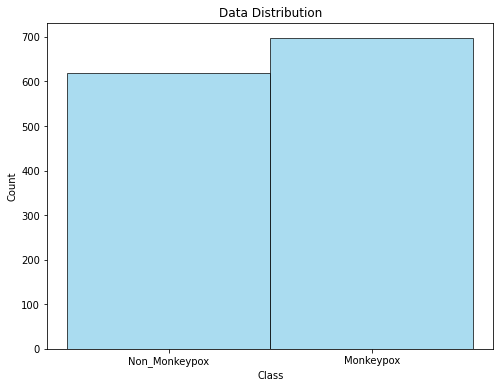

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-40/Downloads/1325_images-20240912T033744Z-001/1325_images"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Monkeypox and Non_Monkeypox)
for class_name in ['Non_Monkeypox', 'Monkeypox']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Non_Monkeypox, 1 for Monkeypox) to the labels list
        labels.append(0 if class_name == 'Non_Monkeypox' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Non_Monkeypox:", np.sum(labels == 0), "Monkeypox:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


In [ ]:
# Balance the dataset with 600 images from each class (Non_Monkeypox and Monkeypox)
non_monkeypox_images = images[labels == 0][:600]
monkeypox_images = images[labels == 1][:600]
non_monkeypox_labels = labels[labels == 0][:600]
monkeypox_labels = labels[labels == 1][:600]

# Concatenate the data back together
balanced_images = np.concatenate([non_monkeypox_images, monkeypox_images])
balanced_labels = np.concatenate([non_monkeypox_labels, monkeypox_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Non_Monkeypox Images:", non_monkeypox_images.shape)
print("Monkeypox Images:", monkeypox_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Non_Monkeypox Images: (600, 224, 224)
Monkeypox Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


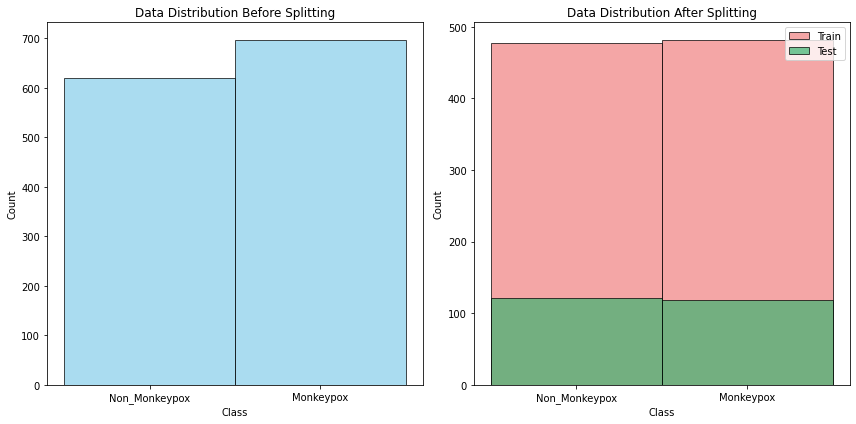

In [ ]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))

# Before splitting (Original data)
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# After splitting (Train and Test sets)
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['Non_Monkeypox', 'Monkeypox'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

def check_dataset_balance(labels):
    # Count the occurrences of each class label
    label_counts = Counter(labels)

    # Print the counts for each class
    print("Class distribution in the dataset:")
    for label, count in label_counts.items():
        class_name = "Monkeypox" if label == 1 else "Non_Monkeypox"
        print(f"{class_name}: {count} images")

    # Check if the dataset is balanced
    counts = list(label_counts.values())
    min_count = min(counts)
    max_count = max(counts)

    is_balanced = min_count == max_count

    if is_balanced:
        print("The dataset is balanced.")
    else:
        print("The dataset is not balanced.")
        print(f"Minimum count: {min_count}, Maximum count: {max_count}")

# Call the function with balanced_labels
check_dataset_balance(balanced_labels)


Class distribution in the dataset:
Non_Monkeypox: 600 images
Monkeypox: 600 images
The dataset is balanced.


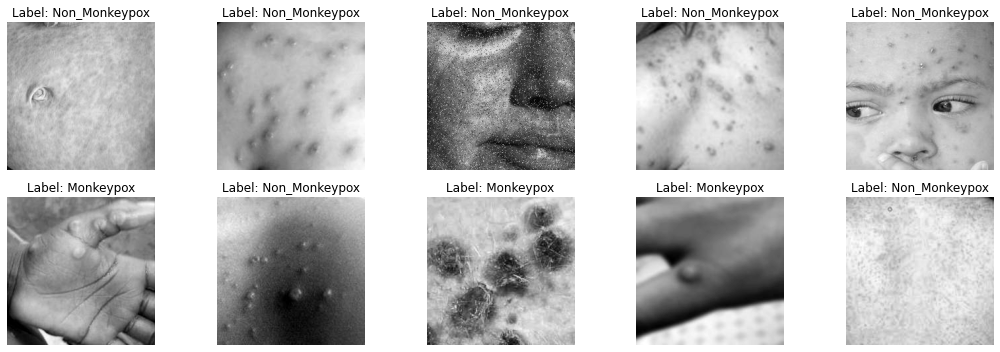

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {"Monkeypox" if label == 1 else "Non_Monkeypox"}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


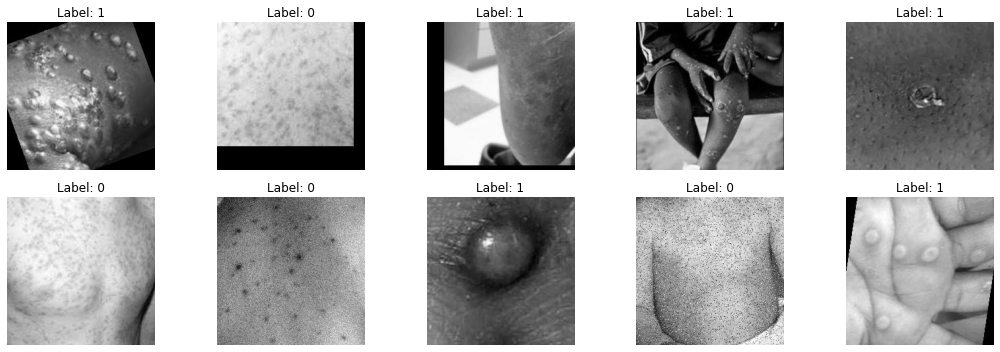

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


In [ ]:
images[0]

array([[0.84705883, 0.8901961 , 0.7294118 , ..., 0.47058824, 0.54901963,
        0.60784316],
       [0.7019608 , 0.8666667 , 0.8       , ..., 0.69803923, 0.5254902 ,
        0.4       ],
       [0.69803923, 0.8745098 , 0.87058824, ..., 0.54901963, 0.6392157 ,
        0.44313726],
       ...,
       [0.49411765, 0.4627451 , 0.5529412 , ..., 0.7058824 , 0.6901961 ,
        0.6392157 ],
       [0.44705883, 0.35686275, 0.5372549 , ..., 0.7411765 , 0.654902  ,
        0.6509804 ],
       [0.5803922 , 0.6509804 , 0.43529412, ..., 0.7294118 , 0.68235296,
        0.6666667 ]], dtype=float32)

# Dense Layers

# 50 epochs

2024-10-16 13:03:21.318882: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 13:03:21.325147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 13:03:21.331680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 13:03:21.333613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 13:03:21.338716: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.5277 - auc: 0.5047 - auc_1: 0.5073 - loss: 1.5736 - precision: 0.5292 - recall: 0.5544 - val_accuracy: 0.4917 - val_auc: 0.5206 - val_auc_1: 0.5066 - val_loss: 0.7193 - val_precision: 0.4917 - val_recall: 1.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 463ms/step - accuracy: 0.5661 - auc: 0.5842 - auc_1: 0.5601 - loss: 0.6844 - precision: 0.5768 - recall: 0.5176 - val_accuracy: 0.5292 - val_auc: 0.6580 - val_auc_1: 0.5944 - val_loss: 0.6874 - val_precision: 0.6316 - val_recall: 0.1017
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.6160 - auc: 0.6494 - auc_1: 0.6589 - loss: 0.6735 - precision: 0.6381 - recall: 0.5798 - val_accuracy: 0.5750 - val_auc: 0.7186 - val_auc_1: 0.6508 - val_loss: 0.6666 - val_precision: 0.6905 - val_recall: 0.2458
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 462ms/step - accuracy: 0.6499 - auc: 0.7282 - auc_1: 0.7217 - loss: 0.6264 - precision: 0.7343 - recall: 0.4883 - val_acc

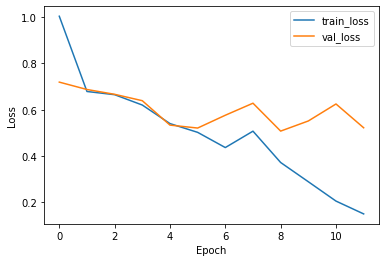

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8340 - auc: 0.8818 - auc_1: 0.8592 - loss: 0.5037 - precision: 0.8591 - recall: 0.7493
Fusion Net Test Accuracy: 80.83%
Fusion Net Precision: 0.85
Fusion Net Recall: 0.75
Fusion Net AUC-ROC: 0.87
Fusion Net AUC-PR: 0.85
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Fusion Net Confusion Matrix:
[[106  16]
 [ 30  88]]
Fusion Net Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       122
           1       0.85      0.75      0.79       118

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240

Fusion Net AUC Score: 0.81
Monkeypox Predictions: 43.33% (104/240)
Non-Monkeypox Predictions: 56.67% (136/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 169.13 seconds


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import time

# Step 1: Load and preprocess data
data_path = r"/home/l2-40/Downloads/1325_images-20240912T033744Z-001/1325_images"
target_size = (224, 224)

images = []
labels = []

for class_name in ['Non_Monkeypox', 'Monkeypox']:
    class_path = os.path.join(data_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(0 if class_name == 'Non_Monkeypox' else 1)

images = np.array(images)
labels = np.array(labels)

# Balance the dataset with 600 images from each class
non_monkeypox_images = images[labels == 0][:600]
monkeypox_images = images[labels == 1][:600]
non_monkeypox_labels = labels[labels == 0][:600]
monkeypox_labels = labels[labels == 1][:600]

balanced_images = np.concatenate([non_monkeypox_images, monkeypox_images])
balanced_labels = np.concatenate([non_monkeypox_labels, monkeypox_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Modify the data shapes for the model
X_train_resized = np.expand_dims(X_train, axis=-1)
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)

X_test_resized = np.expand_dims(X_test, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Step 2: Define Fusion Net architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
fusion_model.summary()

# Step 3: Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Step 4: Train the model
start_time = time.time()
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Step 5: Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Evaluate the model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr = fusion_model.evaluate(X_test_resized, y_test)

# Print evaluation metrics
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')

# Confusion matrix and classification report
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)

print("Fusion Net Confusion Matrix:")
print(fusion_conf_matrix)
print("Fusion Net Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)

print(f'Fusion Net AUC Score: {fusion_roc_auc:.2f}')

# Count predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - accuracy: 0.5517 - auc_2: 0.5576 - auc_3: 0.5297 - loss: 1.5101 - precision_1: 0.5415 - recall_1: 0.5228 - val_accuracy: 0.4958 - val_auc_2: 0.6414 - val_auc_3: 0.5734 - val_loss: 0.7190 - val_precision_1: 0.4000 - val_recall_1: 0.0508
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 468ms/step - accuracy: 0.5664 - auc_2: 0.6365 - auc_3: 0.6313 - loss: 0.6657 - precision_1: 0.5288 - recall_1: 0.4730 - val_accuracy: 0.6500 - val_auc_2: 0.7334 - val_auc_3: 0.6983 - val_loss: 0.6237 - val_precision_1: 0.6308 - val_recall_1: 0.6949
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 460ms/step - accuracy: 0.6405 - auc_2: 0.6709 - auc_3: 0.6582 - loss: 0.6570 - precision_1: 0.6544 - recall_1: 0.6098 - val_accuracy: 0.5417 - val_auc_2: 0.6639 - val_auc_3: 0.6119 - val_loss: 0.7494 - val_precision_1: 0.5175 - val_recall_1: 1.0000
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 453ms/step - accuracy: 0.6277 - auc_2: 0.7601 - auc_3: 0.7637 - loss: 0.6080 - pr

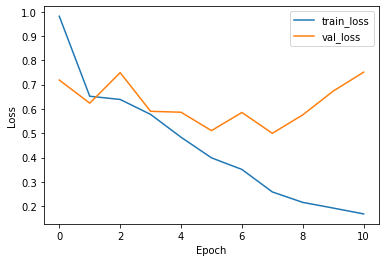

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7747 - auc_2: 0.8853 - auc_3: 0.8723 - loss: 0.4823 - precision_1: 0.7287 - recall_1: 0.7746
Fusion Net Test Accuracy: 80.00%
Fusion Net Precision: 0.79
Fusion Net Recall: 0.81
Fusion Net AUC-ROC: 0.89
Fusion Net AUC-PR: 0.87
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Fusion Net Confusion Matrix:
[[97 25]
 [23 95]]
Fusion Net Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       122
           1       0.79      0.81      0.80       118

    accuracy                           0.80       240
   macro avg       0.80      0.80      0.80       240
weighted avg       0.80      0.80      0.80       240

Fusion Net AUC Score: 0.80
Monkeypox Predictions: 50.00% (120/240)
Non-Monkeypox Predictions: 50.00% (120/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 156.06 seconds


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import time

# Step 1: Load and preprocess data
data_path = r"/home/l2-40/Downloads/1325_images-20240912T033744Z-001/1325_images"
target_size = (224, 224)

images = []
labels = []

for class_name in ['Non_Monkeypox', 'Monkeypox']:
    class_path = os.path.join(data_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(0 if class_name == 'Non_Monkeypox' else 1)

images = np.array(images)
labels = np.array(labels)

# Balance the dataset with 600 images from each class
non_monkeypox_images = images[labels == 0][:600]
monkeypox_images = images[labels == 1][:600]
non_monkeypox_labels = labels[labels == 0][:600]
monkeypox_labels = labels[labels == 1][:600]

balanced_images = np.concatenate([non_monkeypox_images, monkeypox_images])
balanced_labels = np.concatenate([non_monkeypox_labels, monkeypox_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Modify the data shapes for the model
X_train_resized = np.expand_dims(X_train, axis=-1)
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)

X_test_resized = np.expand_dims(X_test, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Step 2: Define Fusion Net architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
fusion_model.summary()

# Step 3: Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Step 4: Train the model
start_time = time.time()
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Step 5: Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Evaluate the model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr = fusion_model.evaluate(X_test_resized, y_test)

# Print evaluation metrics
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')

# Confusion matrix and classification report
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)

print("Fusion Net Confusion Matrix:")
print(fusion_conf_matrix)
print("Fusion Net Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)

print(f'Fusion Net AUC Score: {fusion_roc_auc:.2f}')

# Count predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 479ms/step - accuracy: 0.4701 - auc_4: 0.4575 - auc_5: 0.4617 - loss: 1.7926 - precision_2: 0.4756 - recall_2: 0.6437 - val_accuracy: 0.4917 - val_auc_4: 0.4859 - val_auc_5: 0.4782 - val_loss: 0.7205 - val_precision_2: 0.4917 - val_recall_2: 1.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 463ms/step - accuracy: 0.5231 - auc_4: 0.5420 - auc_5: 0.5265 - loss: 0.7017 - precision_2: 0.5153 - recall_2: 0.9247 - val_accuracy: 0.4958 - val_auc_4: 0.6820 - val_auc_5: 0.6192 - val_loss: 0.6913 - val_precision_2: 0.4937 - val_recall_2: 1.0000
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 459ms/step - accuracy: 0.5901 - auc_4: 0.6357 - auc_5: 0.6545 - loss: 0.6675 - precision_2: 0.5799 - recall_2: 0.6632 - val_accuracy: 0.6833 - val_auc_4: 0.7412 - val_auc_5: 0.7101 - val_loss: 0.6259 - val_precision_2: 0.6591 - val_recall_2: 0.7373
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 462ms/step - accuracy: 0.6901 - auc_4: 0.7445 - auc_5: 0.7568 - loss: 0.5989 - pr

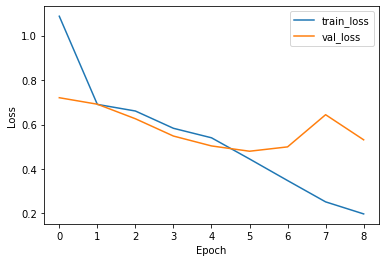

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7611 - auc_4: 0.8651 - auc_5: 0.8441 - loss: 0.4621 - precision_2: 0.7926 - recall_2: 0.6238
Fusion Net Test Accuracy: 75.00%
Fusion Net Precision: 0.82
Fusion Net Recall: 0.63
Fusion Net AUC-ROC: 0.87
Fusion Net AUC-PR: 0.85
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Fusion Net Confusion Matrix:
[[106  16]
 [ 44  74]]
Fusion Net Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       122
           1       0.82      0.63      0.71       118

    accuracy                           0.75       240
   macro avg       0.76      0.75      0.75       240
weighted avg       0.76      0.75      0.75       240

Fusion Net AUC Score: 0.75
Monkeypox Predictions: 37.50% (90/240)
Non-Monkeypox Predictions: 62.50% (150/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 128.74 seconds


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, cohen_kappa_score,
                             matthews_corrcoef)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import time

# Step 1: Load and preprocess data
data_path = r"/home/l2-40/Downloads/1325_images-20240912T033744Z-001/1325_images"
target_size = (224, 224)

images = []
labels = []

for class_name in ['Non_Monkeypox', 'Monkeypox']:
    class_path = os.path.join(data_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(0 if class_name == 'Non_Monkeypox' else 1)

images = np.array(images)
labels = np.array(labels)

# Balance the dataset with 600 images from each class
non_monkeypox_images = images[labels == 0][:600]
monkeypox_images = images[labels == 1][:600]
non_monkeypox_labels = labels[labels == 0][:600]
monkeypox_labels = labels[labels == 1][:600]

balanced_images = np.concatenate([non_monkeypox_images, monkeypox_images])
balanced_labels = np.concatenate([non_monkeypox_labels, monkeypox_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Modify the data shapes for the model
X_train_resized = np.expand_dims(X_train, axis=-1)
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)

X_test_resized = np.expand_dims(X_test, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Step 2: Define Fusion Net architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
fusion_model.summary()

# Step 3: Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Step 4: Train the model
start_time = time.time()
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Step 5: Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Evaluate the model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr = fusion_model.evaluate(X_test_resized, y_test)

# Print evaluation metrics
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')

# Confusion matrix and classification report
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)

print("Fusion Net Confusion Matrix:")
print(fusion_conf_matrix)
print("Fusion Net Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)

print(f'Fusion Net AUC Score: {fusion_roc_auc:.2f}')

# Count predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# Dropout + Dense Layers

# 50 epochs

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,033 (169.36 MB)

 Trainable params: 44,396,033 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 472ms/step - accuracy: 0.5120 - auc_6: 0.5064 - auc_7: 0.5163 - false_negatives: 73.8064 - false_positives: 169.5806 - loss: 1.2544 - precision_3: 0.5142 - recall_3: 0.7363 - true_negatives: 79.3226 - true_positives: 188.2581 - val_accuracy: 0.5083 - val_auc_6: 0.6186 - val_auc_7: 0.5619 - val_false_negatives: 118.0000 - val_false_positives: 0.0000e+00 - val_loss: 0.6934 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_true_negatives: 122.0000 - val_true_positives: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 465ms/step - accuracy: 0.5248 - auc_6: 0.5778 - auc_7: 0.5643 - false_negatives: 155.8710 - false_positives: 78.8064 - loss: 0.6904 - precision_3: 0.5120 - recall_3: 0.3598 - true_negatives: 168.7419 - true_positives: 107.5484 - val_accuracy: 0.5208 - val_auc_6: 0.6377 - val_auc_7: 0.5698 - val_false_negatives: 102.0000 - val_false_positives: 13.0000 - val_loss: 0.6968 - val_precision_3: 0.5517 - val_recall_3: 0.1356 

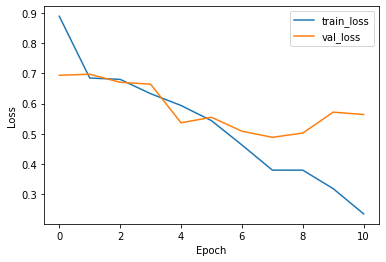

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7809 - auc_6: 0.8704 - auc_7: 0.8387 - false_negatives: 25.8889 - false_positives: 9.0000 - loss: 0.4747 - precision_3: 0.8263 - recall_3: 0.6412 - true_negatives: 73.4444 - true_positives: 44.5556
Fusion Net Test Accuracy: 75.83%
Fusion Net Precision: 0.83
Fusion Net Recall: 0.64
Fusion Net AUC-ROC: 0.87
Fusion Net AUC-PR: 0.85
Fusion Net TN: 107.0, FP: 15.0, FN: 43.0, TP: 75.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Fusion Net Confusion Matrix:
[[107  15]
 [ 43  75]]
Fusion Net Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       122
           1       0.83      0.64      0.72       118

    accuracy                           0.76       240
   macro avg       0.77      0.76      0.75       240
weighted avg       0.77      0.76      0.75       240

Fusion Net AUC Score: 0.76
Fusion Net Precision: 0.83
Fusion Net Recall: 0.64
Fusion Net F1 Score: 0.72
Fusion Net 

NameError: name 'test_predictions' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define Fusion Net architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the Fusion Net model with Adam optimizer and additional metrics
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the Fusion Net model with early stopping and 50 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Fusion Net model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr, fusion_tn, fusion_fp, fusion_fn, fusion_tp = fusion_model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')
print(f'Fusion Net TN: {fusion_tn}, FP: {fusion_fp}, FN: {fusion_fn}, TP: {fusion_tp}')

# Confusion matrix for Fusion Net
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("Fusion Net Confusion Matrix:")
print(fusion_conf_matrix)

# Generate classification report for Fusion Net
print("Fusion Net Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score for Fusion Net
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'Fusion Net AUC Score: {fusion_roc_auc:.2f}')

# Calculate Precision for class 1 (Positive) for Fusion Net
fusion_precision = precision_score(y_test, fusion_test_predictions)
print(f'Fusion Net Precision: {fusion_precision:.2f}')

# Calculate Recall for class 1 (Positive) for Fusion Net
fusion_recall = recall_score(y_test, fusion_test_predictions)
print(f'Fusion Net Recall: {fusion_recall:.2f}')

# Calculate F1 Score for Fusion Net
fusion_f1 = f1_score(y_test, fusion_test_predictions)
print(f'Fusion Net F1 Score: {fusion_f1:.2f}')

# Calculate Precision-Recall curve for Fusion Net
fusion_precision, fusion_recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
fusion_pr_auc = auc(fusion_recall, fusion_precision)
print(f'Fusion Net PR AUC: {fusion_pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient for Fusion Net
fusion_kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {fusion_kappa:.2f}")

# Calculate Matthews Correlation Coefficient for Fusion Net
fusion_mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {fusion_mcc:.2f}")

# Calculate Balanced Accuracy for Fusion Net
fusion_balanced_acc = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"Fusion Net Balanced Accuracy: {fusion_balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,033 (169.36 MB)

 Trainable params: 44,396,033 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 455ms/step - accuracy: 0.5261 - auc_10: 0.5380 - auc_11: 0.5052 - false_negatives_2: 105.6774 - false_positives_2: 142.7419 - loss: 0.9374 - precision_5: 0.5075 - recall_5: 0.5476 - true_negatives_2: 117.8064 - true_positives_2: 144.7419 - val_accuracy: 0.5125 - val_auc_10: 0.6269 - val_auc_11: 0.5872 - val_false_negatives_2: 115.0000 - val_false_positives_2: 2.0000 - val_loss: 0.6910 - val_precision_5: 0.6000 - val_recall_5: 0.0254 - val_true_negatives_2: 120.0000 - val_true_positives_2: 3.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.5374 - auc_10: 0.5878 - auc_11: 0.5699 - false_negatives_2: 163.8065 - false_positives_2: 70.3548 - loss: 0.6880 - precision_5: 0.5923 - recall_5: 0.2487 - true_negatives_2: 188.0323 - true_positives_2: 88.7742 - val_accuracy: 0.6083 - val_auc_10: 0.6451 - val_auc_11: 0.5875 - val_false_negatives_2: 14.0000 - val_false_positives_2: 80.0000 - val_loss: 0.6875 - val_precision_5: 0.5652 -

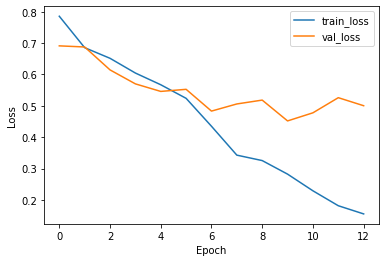

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8048 - auc_10: 0.9024 - auc_11: 0.8751 - false_negatives_2: 7.4444 - false_positives_2: 20.3333 - loss: 0.4555 - precision_5: 0.7292 - recall_5: 0.8891 - true_negatives_2: 62.1111 - true_positives_2: 63.0000
Fusion Net Test Accuracy: 82.92%
Fusion Net Precision: 0.78
Fusion Net Recall: 0.91
Fusion Net AUC-ROC: 0.90
Fusion Net AUC-PR: 0.87
Fusion Net TN: 92.0, FP: 30.0, FN: 11.0, TP: 107.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Fusion Net Confusion Matrix:
[[ 92  30]
 [ 11 107]]
Fusion Net Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       122
           1       0.78      0.91      0.84       118

    accuracy                           0.83       240
   macro avg       0.84      0.83      0.83       240
weighted avg       0.84      0.83      0.83       240

Fusion Net AUC Score: 0.83
Fusion Net Precision: 0.78
Fusion Net Recall: 0.91
Fusion Net F1 Score: 0.84
F

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    precision_recall_curve, auc, precision_score, recall_score, f1_score,
    cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
)
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define Fusion Net architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the Fusion Net model with Adam optimizer and additional metrics
fusion_model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.AUC(curve='PR'),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.TruePositives()
    ]
)

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the Fusion Net model with early stopping and 150 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Fusion Net model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr, fusion_tn, fusion_fp, fusion_fn, fusion_tp = fusion_model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')
print(f'Fusion Net TN: {fusion_tn}, FP: {fusion_fp}, FN: {fusion_fn}, TP: {fusion_tp}')

# Confusion matrix for Fusion Net
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("Fusion Net Confusion Matrix:")
print(fusion_conf_matrix)

# Generate classification report for Fusion Net
print("Fusion Net Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score for Fusion Net
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'Fusion Net AUC Score: {fusion_roc_auc:.2f}')

# Calculate Precision for class 1 (Positive) for Fusion Net
fusion_precision = precision_score(y_test, fusion_test_predictions)
print(f'Fusion Net Precision: {fusion_precision:.2f}')

# Calculate Recall for class 1 (Positive) for Fusion Net
fusion_recall = recall_score(y_test, fusion_test_predictions)
print(f'Fusion Net Recall: {fusion_recall:.2f}')

# Calculate F1 Score for Fusion Net
fusion_f1 = f1_score(y_test, fusion_test_predictions)
print(f'Fusion Net F1 Score: {fusion_f1:.2f}')

# Calculate Precision-Recall curve for Fusion Net
fusion_precision, fusion_recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
fusion_pr_auc = auc(fusion_recall, fusion_precision)
print(f'Fusion Net PR AUC: {fusion_pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient for Fusion Net
fusion_kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {fusion_kappa:.2f}")

# Calculate Matthews Correlation Coefficient for Fusion Net
fusion_mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {fusion_mcc:.2f}")

# Calculate Balanced Accuracy for Fusion Net
fusion_balanced_acc = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"Fusion Net Balanced Accuracy: {fusion_balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,033 (169.36 MB)

 Trainable params: 44,396,033 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 486ms/step - accuracy: 0.5137 - auc_12: 0.5038 - auc_13: 0.4871 - false_negatives_3: 115.2258 - false_positives_3: 129.7097 - loss: 1.1950 - precision_6: 0.5092 - recall_6: 0.5441 - true_negatives_3: 119.2903 - true_positives_3: 146.7419 - val_accuracy: 0.5083 - val_auc_12: 0.5907 - val_auc_13: 0.5539 - val_false_negatives_3: 116.0000 - val_false_positives_3: 2.0000 - val_loss: 0.6917 - val_precision_6: 0.5000 - val_recall_6: 0.0169 - val_true_negatives_3: 120.0000 - val_true_positives_3: 2.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 462ms/step - accuracy: 0.5322 - auc_12: 0.5615 - auc_13: 0.5507 - false_negatives_3: 161.2903 - false_positives_3: 78.8710 - loss: 0.6897 - precision_6: 0.4639 - recall_6: 0.3136 - true_negatives_3: 176.8387 - true_positives_3: 93.9677 - val_accuracy: 0.5000 - val_auc_12: 0.7029 - val_auc_13: 0.6501 - val_false_negatives_3: 1.0000 - val_false_positives_3: 119.0000 - val_loss: 0.6877 - val_precision_6: 0.4958 -

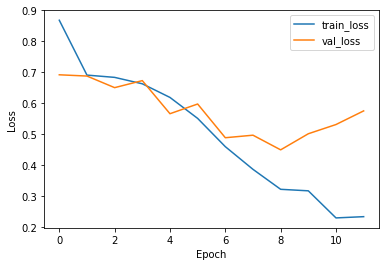

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.8152 - auc_12: 0.8845 - auc_13: 0.8488 - false_negatives_3: 10.2222 - false_positives_3: 16.5556 - loss: 0.4722 - precision_6: 0.7644 - recall_6: 0.8333 - true_negatives_3: 65.8889 - true_positives_3: 60.2222
Fusion Net Test Accuracy: 82.92%
Fusion Net Precision: 0.80
Fusion Net Recall: 0.86
Fusion Net AUC-ROC: 0.90
Fusion Net AUC-PR: 0.86
Fusion Net TN: 97.0, FP: 25.0, FN: 16.0, TP: 102.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Fusion Net Confusion Matrix:
[[ 97  25]
 [ 16 102]]
Fusion Net Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       122
           1       0.80      0.86      0.83       118

    accuracy                           0.83       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.83      0.83       240

Fusion Net AUC Score: 0.83
Fusion Net Precision: 0.80
Fusion Net Recall: 0.86
Fusion Net F1 Score: 0.83


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    precision_recall_curve, auc, precision_score, recall_score, f1_score,
    cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
)
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define Fusion Net architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the Fusion Net model with Adam optimizer and additional metrics
fusion_model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.AUC(curve='PR'),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.TruePositives()
    ]
)

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the Fusion Net model with early stopping and 150 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Fusion Net model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr, fusion_tn, fusion_fp, fusion_fn, fusion_tp = fusion_model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')
print(f'Fusion Net TN: {fusion_tn}, FP: {fusion_fp}, FN: {fusion_fn}, TP: {fusion_tp}')

# Confusion matrix for Fusion Net
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("Fusion Net Confusion Matrix:")
print(fusion_conf_matrix)

# Generate classification report for Fusion Net
print("Fusion Net Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score for Fusion Net
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'Fusion Net AUC Score: {fusion_roc_auc:.2f}')

# Calculate Precision for class 1 (Positive) for Fusion Net
fusion_precision = precision_score(y_test, fusion_test_predictions)
print(f'Fusion Net Precision: {fusion_precision:.2f}')

# Calculate Recall for class 1 (Positive) for Fusion Net
fusion_recall = recall_score(y_test, fusion_test_predictions)
print(f'Fusion Net Recall: {fusion_recall:.2f}')

# Calculate F1 Score for Fusion Net
fusion_f1 = f1_score(y_test, fusion_test_predictions)
print(f'Fusion Net F1 Score: {fusion_f1:.2f}')

# Calculate Precision-Recall curve for Fusion Net
fusion_precision, fusion_recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
fusion_pr_auc = auc(fusion_recall, fusion_precision)
print(f'Fusion Net PR AUC: {fusion_pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient for Fusion Net
fusion_kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {fusion_kappa:.2f}")

# Calculate Matthews Correlation Coefficient for Fusion Net
fusion_mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {fusion_mcc:.2f}")

# Calculate Balanced Accuracy for Fusion Net
fusion_balanced_acc = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"Fusion Net Balanced Accuracy: {fusion_balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# GlobalAveragePooling2D

# 50 epochs

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,233 (622.00 KB)

 Trainable params: 159,233 (622.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 247ms/step - accuracy: 0.4987 - auc_24: 0.4559 - auc_25: 0.4695 - loss: 0.6957 - precision_12: 0.5042 - recall_12: 0.5631 - val_accuracy: 0.5042 - val_auc_24: 0.5625 - val_auc_25: 0.5306 - val_loss: 0.6920 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.5132 - auc_24: 0.5262 - auc_25: 0.5239 - loss: 0.6925 - precision_12: 0.5089 - recall_12: 0.2809 - val_accuracy: 0.5125 - val_auc_24: 0.6040 - val_auc_25: 0.5440 - val_loss: 0.6921 - val_precision_12: 0.5022 - val_recall_12: 0.9492
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.5463 - auc_24: 0.5586 - auc_25: 0.5626 - loss: 0.6912 - precision_12: 0.5522 - recall_12: 0.6130 - val_accuracy: 0.5792 - val_auc_24: 0.6130 - val_auc_25: 0.5420 - val_loss: 0.6894 - val_precision_12: 0.5669 - val_recall_12: 0.6102
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.5314 - auc_24: 0.5837 - auc_25: 

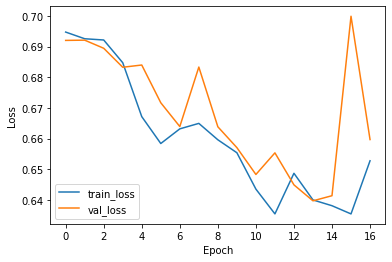

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6019 - auc_24: 0.6522 - auc_25: 0.6207 - loss: 0.6533 - precision_12: 0.5452 - recall_12: 0.5839
Fusion Net Test Accuracy: 62.50%
Fusion Net Precision: 0.62
Fusion Net Recall: 0.62
Fusion Net AUC-ROC: 0.68
Fusion Net AUC-PR: 0.69
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Confusion Matrix:
[[77 45]
 [45 73]]
Area Under the ROC Curve (AUC-ROC): 0.62


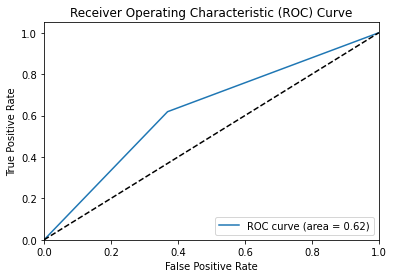

Precision-Recall Curve (AUC-PR): 0.71


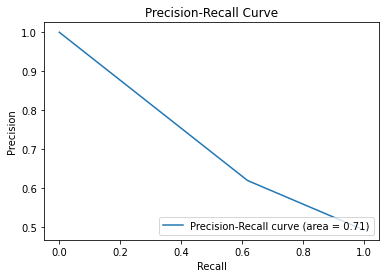

Cohen's Kappa Coefficient: 0.25
Matthews Correlation Coefficient (MCC): 0.25
Balanced Accuracy: 0.62
Monkeypox Predictions: 49.17% (118/240)
Non-Monkeypox Predictions: 50.83% (122/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 129.76 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    accuracy_score, balanced_accuracy_score
)
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define FusionNet architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the FusionNet model with Adam optimizer and additional metrics
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[
    'accuracy', tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(), tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR')
])

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the FusionNet model with early stopping and 50 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the FusionNet model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr = fusion_model.evaluate(X_test_resized, y_test)

# Print the test accuracy and other metrics in the specified format
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')

# Get predictions
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, fusion_test_predictions)
roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,233 (622.00 KB)

 Trainable params: 159,233 (622.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.4539 - auc_26: 0.4305 - auc_27: 0.4686 - loss: 0.6959 - precision_13: 0.4782 - recall_13: 0.6173 - val_accuracy: 0.5042 - val_auc_26: 0.6021 - val_auc_27: 0.5499 - val_loss: 0.6917 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.5168 - auc_26: 0.5330 - auc_27: 0.4969 - loss: 0.6919 - precision_13: 0.1972 - recall_13: 0.0762 - val_accuracy: 0.4917 - val_auc_26: 0.5058 - val_auc_27: 0.4933 - val_loss: 0.6941 - val_precision_13: 0.4917 - val_recall_13: 1.0000
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.4768 - auc_26: 0.4694 - auc_27: 0.4511 - loss: 0.6952 - precision_13: 0.4733 - recall_13: 0.7930 - val_accuracy: 0.5458 - val_auc_26: 0.6086 - val_auc_27: 0.5432 - val_loss: 0.6913 - val_precision_13: 0.5220 - val_recall_13: 0.9068
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.5377 - auc_26: 0.5659 - auc_

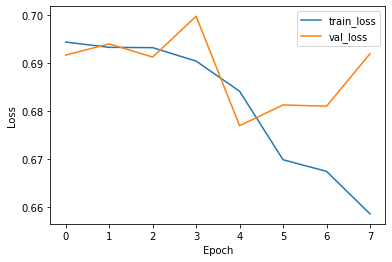

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5621 - auc_26: 0.6129 - auc_27: 0.5087 - loss: 0.6786 - precision_13: 0.5042 - recall_13: 0.5776
Fusion Net Test Accuracy: 57.08%
Fusion Net Precision: 0.56
Fusion Net Recall: 0.58
Fusion Net AUC-ROC: 0.61
Fusion Net AUC-PR: 0.55
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Confusion Matrix:
[[68 54]
 [49 69]]
Area Under the ROC Curve (AUC-ROC): 0.57


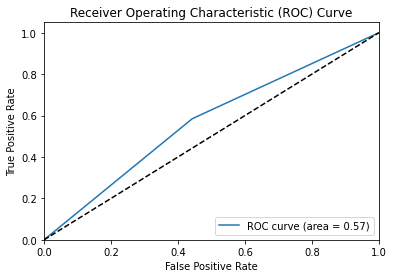

Precision-Recall Curve (AUC-PR): 0.67


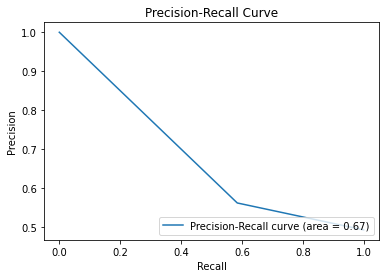

Cohen's Kappa Coefficient: 0.14
Matthews Correlation Coefficient (MCC): 0.14
Balanced Accuracy: 0.57
Monkeypox Predictions: 51.25% (123/240)
Non-Monkeypox Predictions: 48.75% (117/240)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total Time taken: 62.87 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    accuracy_score, balanced_accuracy_score
)
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define FusionNet architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the FusionNet model with Adam optimizer and additional metrics
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[
    'accuracy', tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(), tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR')
])

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the FusionNet model with early stopping and 50 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the FusionNet model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr = fusion_model.evaluate(X_test_resized, y_test)

# Print the test accuracy and other metrics in the specified format
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')

# Get predictions
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, fusion_test_predictions)
roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,233 (622.00 KB)

 Trainable params: 159,233 (622.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - accuracy: 0.5052 - auc_28: 0.5036 - auc_29: 0.5025 - loss: 0.6936 - precision_14: 0.5152 - recall_14: 0.4596 - val_accuracy: 0.5083 - val_auc_28: 0.5959 - val_auc_29: 0.5368 - val_loss: 0.6911 - val_precision_14: 0.5000 - val_recall_14: 0.0085
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.5399 - auc_28: 0.5518 - auc_29: 0.5496 - loss: 0.6901 - precision_14: 0.5556 - recall_14: 0.6236 - val_accuracy: 0.4875 - val_auc_28: 0.6085 - val_auc_29: 0.5410 - val_loss: 0.6903 - val_precision_14: 0.1429 - val_recall_14: 0.0085
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.4992 - auc_28: 0.5372 - auc_29: 0.5279 - loss: 0.6932 - precision_14: 0.5056 - recall_14: 0.3547 - val_accuracy: 0.5042 - val_auc_28: 0.6064 - val_auc_29: 0.5413 - val_loss: 0.6883 - val_precision_14: 0.4545 - val_recall_14: 0.0424
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.5378 - auc_28: 0.5942 - auc_29: 0.58

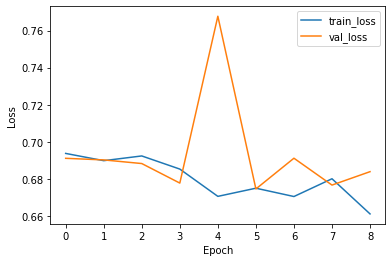

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5693 - auc_28: 0.6112 - auc_29: 0.5096 - loss: 0.6735 - precision_14: 0.5105 - recall_14: 0.5991
Fusion Net Test Accuracy: 57.50%
Fusion Net Precision: 0.56
Fusion Net Recall: 0.60
Fusion Net AUC-ROC: 0.61
Fusion Net AUC-PR: 0.54
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Confusion Matrix:
[[67 55]
 [47 71]]
Area Under the ROC Curve (AUC-ROC): 0.58


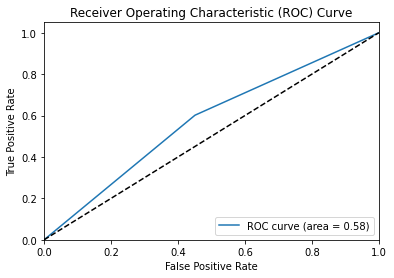

Precision-Recall Curve (AUC-PR): 0.68


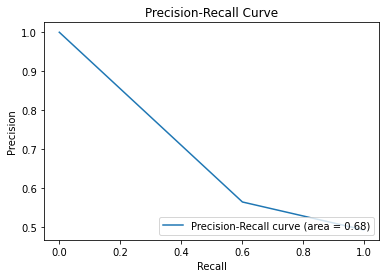

Cohen's Kappa Coefficient: 0.15
Matthews Correlation Coefficient (MCC): 0.15
Balanced Accuracy: 0.58
Monkeypox Predictions: 52.50% (126/240)
Non-Monkeypox Predictions: 47.50% (114/240)
The model predicted more Monkeypox cases than non-Monkeypox cases.
Total Time taken: 70.35 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    accuracy_score, balanced_accuracy_score
)
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define FusionNet architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the FusionNet model with Adam optimizer and additional metrics
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[
    'accuracy', tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(), tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR')
])

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the FusionNet model with early stopping and 50 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the FusionNet model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr = fusion_model.evaluate(X_test_resized, y_test)

# Print the test accuracy and other metrics in the specified format
print(f'Fusion Net Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {fusion_precision:.2f}')
print(f'Fusion Net Recall: {fusion_recall:.2f}')
print(f'Fusion Net AUC-ROC: {fusion_auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {fusion_auc_pr:.2f}')

# Get predictions
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, fusion_test_predictions)
roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# Conv2D + GlobalAveragePooling2D +Dropout+ Dense Layers

# 50 epochs

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,233 (622.00 KB)

 Trainable params: 159,233 (622.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 857ms/step - accuracy: 0.4816 - auc_30: 0.4780 - auc_31: 0.4691 - false_negatives_5: 196.8387 - false_positives_5: 68.0000 - loss: 0.6947 - precision_15: 0.4670 - recall_15: 0.2648 - true_negatives_5: 186.4516 - true_positives_5: 59.6774 - val_accuracy: 0.4958 - val_auc_30: 0.5957 - val_auc_31: 0.5333 - val_false_negatives_5: 114.0000 - val_false_positives_5: 7.0000 - val_loss: 0.6907 - val_precision_15: 0.3636 - val_recall_15: 0.0339 - val_true_negatives_5: 115.0000 - val_true_positives_5: 4.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 847ms/step - accuracy: 0.5243 - auc_30: 0.5198 - auc_31: 0.4942 - false_negatives_5: 180.8387 - false_positives_5: 59.6129 - loss: 0.6927 - precision_15: 0.5111 - recall_15: 0.2640 - true_negatives_5: 199.5806 - true_positives_5: 70.9355 - val_accuracy: 0.5167 - val_auc_30: 0.6068 - val_auc_31: 0.5456 - val_false_negatives_5: 7.0000 - val_false_positives_5: 109.0000 - val_loss: 0.6910 - val_precision_15: 0.504

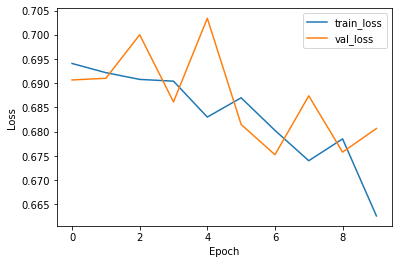

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.5683 - auc_30: 0.6200 - auc_31: 0.5154 - false_negatives_5: 23.7778 - false_positives_5: 40.4444 - loss: 0.6743 - precision_15: 0.5085 - recall_15: 0.6473 - true_negatives_5: 42.0000 - true_positives_5: 46.6667
FusionNet Test Accuracy: 59.58%
FusionNet Precision: 0.58
FusionNet Recall: 0.67
FusionNet AUC-ROC: 0.62
FusionNet AUC-PR: 0.55
FusionNet TP: 79.0, FP: 58.0, TN: 64.0, FN: 39.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
FusionNet Confusion Matrix:
[[64 58]
 [39 79]]
FusionNet Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.52      0.57       122
           1       0.58      0.67      0.62       118

    accuracy                           0.60       240
   macro avg       0.60      0.60      0.59       240
weighted avg       0.60      0.60      0.59       240

FusionNet AUC Score: 0.60
FusionNet PR AUC: 0.70
FusionNet Cohen's Kappa Coefficient: 0.19
FusionNet Matthews Cor

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define FusionNet architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the FusionNet model with Adam optimizer and additional metrics
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR'),
    tf.keras.metrics.TruePositives(),
    tf.keras.metrics.FalsePositives(),
    tf.keras.metrics.TrueNegatives(),
    tf.keras.metrics.FalseNegatives()
])

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the FusionNet model with early stopping and 50 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the FusionNet model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr, fusion_tp, fusion_fp, fusion_tn, fusion_fn = fusion_model.evaluate(X_test_resized, y_test)
print(f'FusionNet Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'FusionNet Precision: {fusion_precision:.2f}')
print(f'FusionNet Recall: {fusion_recall:.2f}')
print(f'FusionNet AUC-ROC: {fusion_auc_roc:.2f}')
print(f'FusionNet AUC-PR: {fusion_auc_pr:.2f}')
print(f'FusionNet TP: {fusion_tp}, FP: {fusion_fp}, TN: {fusion_tn}, FN: {fusion_fn}')

# Confusion matrix
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("FusionNet Confusion Matrix:")
print(fusion_conf_matrix)

# Generate classification report
print("FusionNet Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'FusionNet AUC Score: {fusion_roc_auc:.2f}')

# Precision-Recall curve and PR AUC
fusion_precision, fusion_recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
fusion_pr_auc = auc(fusion_recall, fusion_precision)
print(f'FusionNet PR AUC: {fusion_pr_auc:.2f}')

# Cohen's Kappa Coefficient
fusion_kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"FusionNet Cohen's Kappa Coefficient: {fusion_kappa:.2f}")

# Matthews Correlation Coefficient
fusion_mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"FusionNet Matthews Correlation Coefficient (MCC): {fusion_mcc:.2f}")

# Balanced Accuracy
fusion_balanced_accuracy = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"FusionNet Balanced Accuracy: {fusion_balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,233 (622.00 KB)

 Trainable params: 159,233 (622.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 873ms/step - accuracy: 0.4723 - auc_32: 0.4892 - auc_33: 0.4860 - false_negatives_6: 169.1613 - false_positives_6: 97.7419 - loss: 0.6956 - precision_16: 0.4624 - recall_16: 0.3040 - true_negatives_6: 157.3871 - true_positives_6: 86.6774 - val_accuracy: 0.5125 - val_auc_32: 0.5968 - val_auc_33: 0.5353 - val_false_negatives_6: 105.0000 - val_false_positives_6: 12.0000 - val_loss: 0.6908 - val_precision_16: 0.5200 - val_recall_16: 0.1102 - val_true_negatives_6: 110.0000 - val_true_positives_6: 13.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 855ms/step - accuracy: 0.4817 - auc_32: 0.5014 - auc_33: 0.5030 - false_negatives_6: 126.8710 - false_positives_6: 130.1935 - loss: 0.6936 - precision_16: 0.4830 - recall_16: 0.4838 - true_negatives_6: 127.4839 - true_positives_6: 126.4194 - val_accuracy: 0.6167 - val_auc_32: 0.6164 - val_auc_33: 0.5556 - val_false_negatives_6: 26.0000 - val_false_positives_6: 66.0000 - val_loss: 0.6902 - val_precision_16:

30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 844ms/step - accuracy: 0.6038 - auc_32: 0.6127 - auc_33: 0.6153 - false_negatives_6: 89.5806 - false_positives_6: 103.6129 - loss: 0.6743 - precision_16: 0.5970 - recall_16: 0.6373 - true_negatives_6: 154.4194 - true_positives_6: 163.3548 - val_accuracy: 0.5250 - val_auc_32: 0.6683 - val_auc_33: 0.6767 - val_false_negatives_6: 10.0000 - val_false_positives_6: 104.0000 - val_loss: 0.7288 - val_precision_16: 0.5094 - val_recall_16: 0.9153 - val_true_negatives_6: 18.0000 - val_true_positives_6: 108.0000
Epoch 16/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 854ms/step - accuracy: 0.6013 - auc_32: 0.6504 - auc_33: 0.6263 - false_negatives_6: 83.3871 - false_positives_6: 114.8710 - loss: 0.6739 - precision_16: 0.5946 - recall_16: 0.7269 - true_negatives_6: 137.6452 - true_positives_6: 175.0645 - val_accuracy: 0.6417 - val_auc_32: 0.6606 - val_auc_33: 0.6728 - val_false_negatives_6: 23.0000 - val_false_positives_6: 63.0000 - val_loss: 0.6579 - val_precision_16: 0.6013 - v

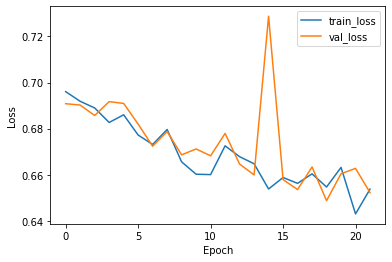

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.6069 - auc_32: 0.6477 - auc_33: 0.6077 - false_negatives_6: 28.6667 - false_positives_6: 29.4444 - loss: 0.6588 - precision_16: 0.5525 - recall_16: 0.5783 - true_negatives_6: 53.0000 - true_positives_6: 41.7778
FusionNet Test Accuracy: 62.50%
FusionNet Precision: 0.62
FusionNet Recall: 0.60
FusionNet AUC-ROC: 0.67
FusionNet AUC-PR: 0.68
FusionNet TP: 71.0, FP: 43.0, TN: 79.0, FN: 47.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
FusionNet Confusion Matrix:
[[79 43]
 [47 71]]
FusionNet Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       122
           1       0.62      0.60      0.61       118

    accuracy                           0.62       240
   macro avg       0.62      0.62      0.62       240
weighted avg       0.62      0.62      0.62       240

FusionNet AUC Score: 0.62
FusionNet PR AUC: 0.71
FusionNet Cohen's Kappa Coefficient: 0.25
FusionNet Matthews Cor

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define FusionNet architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the FusionNet model with Adam optimizer and additional metrics
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR'),
    tf.keras.metrics.TruePositives(),
    tf.keras.metrics.FalsePositives(),
    tf.keras.metrics.TrueNegatives(),
    tf.keras.metrics.FalseNegatives()
])

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the FusionNet model with early stopping and 50 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the FusionNet model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr, fusion_tp, fusion_fp, fusion_tn, fusion_fn = fusion_model.evaluate(X_test_resized, y_test)
print(f'FusionNet Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'FusionNet Precision: {fusion_precision:.2f}')
print(f'FusionNet Recall: {fusion_recall:.2f}')
print(f'FusionNet AUC-ROC: {fusion_auc_roc:.2f}')
print(f'FusionNet AUC-PR: {fusion_auc_pr:.2f}')
print(f'FusionNet TP: {fusion_tp}, FP: {fusion_fp}, TN: {fusion_tn}, FN: {fusion_fn}')

# Confusion matrix
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("FusionNet Confusion Matrix:")
print(fusion_conf_matrix)

# Generate classification report
print("FusionNet Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'FusionNet AUC Score: {fusion_roc_auc:.2f}')

# Precision-Recall curve and PR AUC
fusion_precision, fusion_recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
fusion_pr_auc = auc(fusion_recall, fusion_precision)
print(f'FusionNet PR AUC: {fusion_pr_auc:.2f}')

# Cohen's Kappa Coefficient
fusion_kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"FusionNet Cohen's Kappa Coefficient: {fusion_kappa:.2f}")

# Matthews Correlation Coefficient
fusion_mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"FusionNet Matthews Correlation Coefficient (MCC): {fusion_mcc:.2f}")

# Balanced Accuracy
fusion_balanced_accuracy = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"FusionNet Balanced Accuracy: {fusion_balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,233 (622.00 KB)

 Trainable params: 159,233 (622.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 873ms/step - accuracy: 0.4806 - auc_34: 0.4950 - auc_35: 0.4853 - false_negatives_7: 208.0645 - false_positives_7: 55.0968 - loss: 0.6948 - precision_17: 0.4515 - recall_17: 0.2004 - true_negatives_7: 201.1290 - true_positives_7: 46.6774 - val_accuracy: 0.5333 - val_auc_34: 0.6160 - val_auc_35: 0.5504 - val_false_negatives_7: 12.0000 - val_false_positives_7: 100.0000 - val_loss: 0.6918 - val_precision_17: 0.5146 - val_recall_17: 0.8983 - val_true_negatives_7: 22.0000 - val_true_positives_7: 106.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 855ms/step - accuracy: 0.5183 - auc_34: 0.4918 - auc_35: 0.5132 - false_negatives_7: 23.7742 - false_positives_7: 224.5806 - loss: 0.6933 - precision_17: 0.5244 - recall_17: 0.8922 - true_negatives_7: 26.9355 - true_positives_7: 235.6774 - val_accuracy: 0.5000 - val_auc_34: 0.6017 - val_auc_35: 0.5340 - val_false_negatives_7: 105.0000 - val_false_positives_7: 15.0000 - val_loss: 0.6882 - val_precision_17: 

30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 860ms/step - accuracy: 0.6244 - auc_34: 0.6883 - auc_35: 0.6784 - false_negatives_7: 103.5484 - false_positives_7: 91.2581 - loss: 0.6432 - precision_17: 0.6348 - recall_17: 0.5740 - true_negatives_7: 164.2258 - true_positives_7: 151.9355 - val_accuracy: 0.6167 - val_auc_34: 0.6684 - val_auc_35: 0.6806 - val_false_negatives_7: 41.0000 - val_false_positives_7: 51.0000 - val_loss: 0.6498 - val_precision_17: 0.6016 - val_recall_17: 0.6525 - val_true_negatives_7: 71.0000 - val_true_positives_7: 77.0000
Epoch 16/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 856ms/step - accuracy: 0.6364 - auc_34: 0.6854 - auc_35: 0.6890 - false_negatives_7: 86.7742 - false_positives_7: 101.2258 - loss: 0.6437 - precision_17: 0.6302 - recall_17: 0.6731 - true_negatives_7: 150.5484 - true_positives_7: 172.4194 - val_accuracy: 0.5792 - val_auc_34: 0.6514 - val_auc_35: 0.6618 - val_false_negatives_7: 57.0000 - val_false_positives_7: 44.0000 - val_loss: 0.6554 - val_precision_17: 0.5810 - val

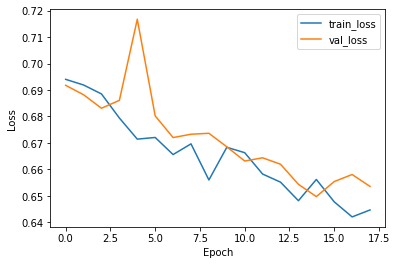

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.5934 - auc_34: 0.6401 - auc_35: 0.6069 - false_negatives_7: 25.3333 - false_positives_7: 34.6667 - loss: 0.6641 - precision_17: 0.5321 - recall_17: 0.6173 - true_negatives_7: 47.7778 - true_positives_7: 45.1111
FusionNet Test Accuracy: 61.67%
FusionNet Precision: 0.60
FusionNet Recall: 0.65
FusionNet AUC-ROC: 0.67
FusionNet AUC-PR: 0.68
FusionNet TP: 77.0, FP: 51.0, TN: 71.0, FN: 41.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
FusionNet Confusion Matrix:
[[71 51]
 [41 77]]
FusionNet Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       122
           1       0.60      0.65      0.63       118

    accuracy                           0.62       240
   macro avg       0.62      0.62      0.62       240
weighted avg       0.62      0.62      0.62       240

FusionNet AUC Score: 0.62
FusionNet PR AUC: 0.71
FusionNet Cohen's Kappa Coefficient: 0.23
FusionNet Matthews Cor

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define FusionNet architecture
fusion_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the FusionNet model with Adam optimizer and additional metrics
fusion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR'),
    tf.keras.metrics.TruePositives(),
    tf.keras.metrics.FalsePositives(),
    tf.keras.metrics.TrueNegatives(),
    tf.keras.metrics.FalseNegatives()
])

# Display model summary
fusion_model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the FusionNet model with early stopping and 50 epochs
fusion_history = fusion_model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(fusion_history.history['loss'], label='train_loss')
plt.plot(fusion_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the FusionNet model
fusion_test_loss, fusion_test_accuracy, fusion_precision, fusion_recall, fusion_auc_roc, fusion_auc_pr, fusion_tp, fusion_fp, fusion_tn, fusion_fn = fusion_model.evaluate(X_test_resized, y_test)
print(f'FusionNet Test Accuracy: {fusion_test_accuracy * 100:.2f}%')
print(f'FusionNet Precision: {fusion_precision:.2f}')
print(f'FusionNet Recall: {fusion_recall:.2f}')
print(f'FusionNet AUC-ROC: {fusion_auc_roc:.2f}')
print(f'FusionNet AUC-PR: {fusion_auc_pr:.2f}')
print(f'FusionNet TP: {fusion_tp}, FP: {fusion_fp}, TN: {fusion_tn}, FN: {fusion_fn}')

# Confusion matrix
fusion_test_predictions = (fusion_model.predict(X_test_resized) > 0.5).astype(int)
fusion_conf_matrix = confusion_matrix(y_test, fusion_test_predictions)
print("FusionNet Confusion Matrix:")
print(fusion_conf_matrix)

# Generate classification report
print("FusionNet Classification Report:")
print(classification_report(y_test, fusion_test_predictions))

# ROC curve and AUC score
fusion_fpr, fusion_tpr, fusion_thresholds = roc_curve(y_test, fusion_test_predictions)
fusion_roc_auc = roc_auc_score(y_test, fusion_test_predictions)
print(f'FusionNet AUC Score: {fusion_roc_auc:.2f}')

# Precision-Recall curve and PR AUC
fusion_precision, fusion_recall, _ = precision_recall_curve(y_test, fusion_test_predictions)
fusion_pr_auc = auc(fusion_recall, fusion_precision)
print(f'FusionNet PR AUC: {fusion_pr_auc:.2f}')

# Cohen's Kappa Coefficient
fusion_kappa = cohen_kappa_score(y_test, fusion_test_predictions)
print(f"FusionNet Cohen's Kappa Coefficient: {fusion_kappa:.2f}")

# Matthews Correlation Coefficient
fusion_mcc = matthews_corrcoef(y_test, fusion_test_predictions)
print(f"FusionNet Matthews Correlation Coefficient (MCC): {fusion_mcc:.2f}")

# Balanced Accuracy
fusion_balanced_accuracy = balanced_accuracy_score(y_test, fusion_test_predictions)
print(f"FusionNet Balanced Accuracy: {fusion_balanced_accuracy:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(fusion_test_predictions)
monkeypox_predictions = np.sum(fusion_test_predictions == 1)
non_monkeypox_predictions = np.sum(fusion_test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# LSTM

# 50 epochs

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 186624)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    95,617,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,645,249 (364.86 MB)

 Trainable params: 95,645,249 (364.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 755ms/step - accuracy: 0.4855 - loss: 0.7509 - val_accuracy: 0.5083 - val_loss: 0.6931
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 741ms/step - accuracy: 0.5013 - loss: 0.6946 - val_accuracy: 0.4917 - val_loss: 0.6940
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 739ms/step - accuracy: 0.5080 - loss: 0.6946 - val_accuracy: 0.5083 - val_loss: 0.6931
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 731ms/step - accuracy: 0.5114 - loss: 0.6943 - val_accuracy: 0.4917 - val_loss: 0.6968
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


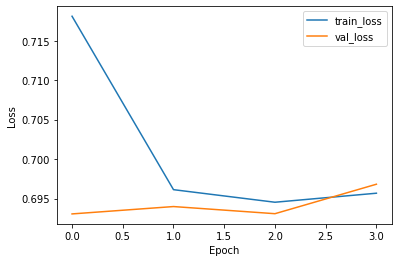

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5577 - loss: 0.6906
Fusion Net Test Accuracy: 50.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

Fusion Net AUC Score: 0.50
Fusion Net Precision: 0.00
Fusion Net Recall: 0.00
Fusion Net F1 Score: 0.00
Fusion Net Cohen's Kappa Coefficient: 0.00
Fusion Net Matthews Correlation Coefficient (MCC): 0.00
Fusion Net Balanced Accuracy: 0.50
Monkeypox Predictions: 0.00% (0/240)
Non-Monkeypox Predictions: 100.00% (240/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 92.17 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    balanced_accuracy_score
)
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define the input shape
input_shape = (224, 224, 3)

# Define the CNN base model
input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {test_accuracy * 100:.2f}%')

# Predict classes
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Fusion Net AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print(f'Fusion Net Precision: {precision:.2f}')
print(f'Fusion Net Recall: {recall:.2f}')
print(f'Fusion Net F1 Score: {f1:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Fusion Net Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 186624)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │    95,617,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,645,249 (364.86 MB)

 Trainable params: 95,645,249 (364.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 763ms/step - accuracy: 0.5094 - loss: 0.7862 - val_accuracy: 0.4917 - val_loss: 0.7010
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 740ms/step - accuracy: 0.4846 - loss: 0.6993 - val_accuracy: 0.5083 - val_loss: 0.6942
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 731ms/step - accuracy: 0.4934 - loss: 0.6977 - val_accuracy: 0.4917 - val_loss: 0.6955
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 731ms/step - accuracy: 0.4981 - loss: 0.6949 - val_accuracy: 0.5083 - val_loss: 0.6952
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 735ms/step - accuracy: 0.4902 - loss: 0.6977 - val_accuracy: 0.5083 - val_loss: 0.6931
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 732ms/step - accuracy: 0.5359 - loss: 0.6950 - val_accuracy: 0.4917 - val_loss: 0.6968
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 734ms/step - accuracy: 0.5383 - loss: 0.6938 - val_accuracy: 0.4917 - val_loss: 0.6951
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 732ms/step - accuracy: 0.4652 - loss: 0.7027 - 

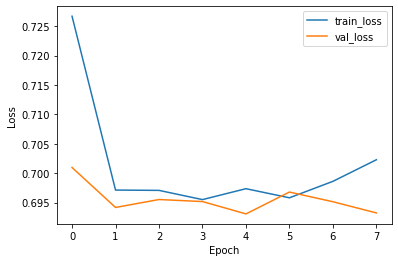

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5577 - loss: 0.6921
Fusion Net Test Accuracy: 50.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

Fusion Net AUC Score: 0.50
Fusion Net Precision: 0.00
Fusion Net Recall: 0.00
Fusion Net F1 Score: 0.00
Fusion Net Cohen's Kappa Coefficient: 0.00
Fusion Net Matthews Correlation Coefficient (MCC): 0.00
Fusion Net Balanced Accuracy: 0.50
Monkeypox Predictions: 0.00% (0/240)
Non-Monkeypox Predictions: 100.00% (240/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 180.17 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    balanced_accuracy_score
)
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define the input shape
input_shape = (224, 224, 3)

# Define the CNN base model
input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {test_accuracy * 100:.2f}%')

# Predict classes
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Fusion Net AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print(f'Fusion Net Precision: {precision:.2f}')
print(f'Fusion Net Recall: {recall:.2f}')
print(f'Fusion Net F1 Score: {f1:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Fusion Net Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 186624)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │    95,617,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,645,249 (364.86 MB)

 Trainable params: 95,645,249 (364.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 757ms/step - accuracy: 0.5080 - loss: 0.7173 - val_accuracy: 0.5083 - val_loss: 0.6938
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 731ms/step - accuracy: 0.4930 - loss: 0.6963 - val_accuracy: 0.5083 - val_loss: 0.6966
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 730ms/step - accuracy: 0.5475 - loss: 0.6901 - val_accuracy: 0.4917 - val_loss: 0.7076
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 732ms/step - accuracy: 0.5057 - loss: 0.6979 - val_accuracy: 0.5083 - val_loss: 0.6950
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


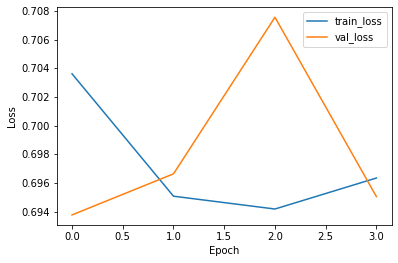

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5577 - loss: 0.6883
Fusion Net Test Accuracy: 50.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

Fusion Net AUC Score: 0.50
Fusion Net Precision: 0.00
Fusion Net Recall: 0.00
Fusion Net F1 Score: 0.00
Fusion Net Cohen's Kappa Coefficient: 0.00
Fusion Net Matthews Correlation Coefficient (MCC): 0.00
Fusion Net Balanced Accuracy: 0.50
Monkeypox Predictions: 0.00% (0/240)
Non-Monkeypox Predictions: 100.00% (240/240)
The model predicted more non-Monkeypox cases than Monkeypox cases.
Total Time taken: 91.91 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve,
    auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef,
    balanced_accuracy_score
)
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define the input shape
input_shape = (224, 224, 3)

# Define the CNN base model
input_layer = Input(shape=input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)

# Define the LSTM layer
reshape = Reshape((1, -1))(flatten)
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {test_accuracy * 100:.2f}%')

# Predict classes
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Fusion Net AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print(f'Fusion Net Precision: {precision:.2f}')
print(f'Fusion Net Recall: {recall:.2f}')
print(f'Fusion Net F1 Score: {f1:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Fusion Net Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# GRU + Dense Layers

# 50 epochs

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 36864)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 1, 128)         │    14,205,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,630,849 (55.81 MB)

 Trainable params: 14,630,849 (55.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 362ms/step - accuracy: 0.5075 - auc_36: 0.4897 - auc_37: 0.5301 - false_negatives_8: 116.6774 - false_positives_8: 133.3871 - loss: 0.7115 - precision_18: 0.5030 - recall_18: 0.5543 - true_negatives_8: 111.4516 - true_positives_8: 149.4516 - val_accuracy: 0.5083 - val_auc_36: 0.6114 - val_auc_37: 0.5665 - val_false_negatives_8: 118.0000 - val_false_positives_8: 0.0000e+00 - val_loss: 0.6927 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_true_negatives_8: 122.0000 - val_true_positives_8: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.5176 - auc_36: 0.5273 - auc_37: 0.5077 - false_negatives_8: 104.1613 - false_positives_8: 145.8710 - loss: 0.6931 - precision_18: 0.3893 - recall_18: 0.4337 - true_negatives_8: 110.9355 - true_positives_8: 150.0000 - val_accuracy: 0.5958 - val_auc_36: 0.5833 - val_auc_37: 0.5264 - val_false_negatives_8: 39.0000 - val_false_positives_8: 58.0000 - val_loss: 0.6918 - val

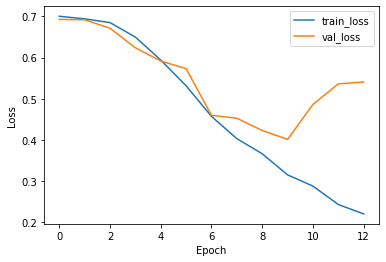

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8329 - auc_36: 0.9175 - auc_37: 0.8946 - false_negatives_8: 8.5556 - false_positives_8: 15.5556 - loss: 0.3752 - precision_18: 0.7803 - recall_18: 0.8636 - true_negatives_8: 66.8889 - true_positives_8: 61.8889
Fusion Net Test Accuracy: 83.75%
Fusion Net Precision: 0.80
Fusion Net Recall: 0.89
Fusion Net AUC-ROC: 0.91
Fusion Net AUC-PR: 0.89
Fusion Net TP: 105.0, FP: 26.0, TN: 96.0, FN: 13.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
Confusion Matrix:
[[ 96  26]
 [ 13 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       122
           1       0.80      0.89      0.84       118

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240

Fusion Net AUC Score: 0.84

Fusion Net Precision: 0.8015267175572519
Fusion Net Recall: 0.8898305084745762
Fusion Net F1 Scor

In [ ]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score,
    recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
)
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Flatten(),  # Flatten layer
    Reshape((1, -1)),  # Reshape for GRU
    GRU(128, return_sequences=True),  # GRU layer
    GRU(64),  # GRU layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR'),
    tf.keras.metrics.TruePositives(),
    tf.keras.metrics.FalsePositives(),
    tf.keras.metrics.TrueNegatives(),
    tf.keras.metrics.FalseNegatives()
])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {precision:.2f}')
print(f'Fusion Net Recall: {recall:.2f}')
print(f'Fusion Net AUC-ROC: {auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {auc_pr:.2f}')
print(f'Fusion Net TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Predict classes
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Fusion Net AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nFusion Net Precision:", precision)
print("Fusion Net Recall:", recall)
print("Fusion Net F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Fusion Net Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 150 epochs

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 1, 36864)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 1, 128)         │    14,205,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,630,849 (55.81 MB)

 Trainable params: 14,630,849 (55.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 363ms/step - accuracy: 0.4766 - auc_38: 0.4860 - auc_39: 0.4624 - false_negatives_9: 154.9677 - false_positives_9: 113.4839 - loss: 0.7107 - precision_19: 0.4628 - recall_19: 0.4300 - true_negatives_9: 143.3548 - true_positives_9: 99.1613 - val_accuracy: 0.4917 - val_auc_38: 0.4715 - val_auc_39: 0.4760 - val_false_negatives_9: 0.0000e+00 - val_false_positives_9: 122.0000 - val_loss: 0.6939 - val_precision_19: 0.4917 - val_recall_19: 1.0000 - val_true_negatives_9: 0.0000e+00 - val_true_positives_9: 118.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.4913 - auc_38: 0.5019 - auc_39: 0.4852 - false_negatives_9: 97.6774 - false_positives_9: 154.7742 - loss: 0.6939 - precision_19: 0.4896 - recall_19: 0.6826 - true_negatives_9: 102.0323 - true_positives_9: 156.4839 - val_accuracy: 0.6000 - val_auc_38: 0.6375 - val_auc_39: 0.5803 - val_false_negatives_9: 53.0000 - val_false_positives_9: 43.0000 - val_loss: 0.6849 - val_precisi

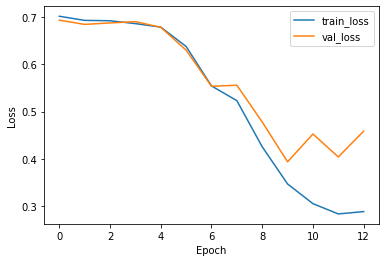

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8647 - auc_38: 0.9109 - auc_39: 0.8246 - false_negatives_9: 9.8889 - false_positives_9: 10.6667 - loss: 0.4006 - precision_19: 0.8453 - recall_19: 0.8477 - true_negatives_9: 71.7778 - true_positives_9: 60.5556
Fusion Net Test Accuracy: 85.83%
Fusion Net Precision: 0.84
Fusion Net Recall: 0.88
Fusion Net AUC-ROC: 0.91
Fusion Net AUC-PR: 0.85
Fusion Net TP: 104.0, FP: 20.0, TN: 102.0, FN: 14.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
Confusion Matrix:
[[102  20]
 [ 14 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       122
           1       0.84      0.88      0.86       118

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240

Fusion Net AUC Score: 0.86

Fusion Net Precision: 0.8387096774193549
Fusion Net Recall: 0.8813559322033898
Fusion Net F1 Sco

In [ ]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score,
    recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
)
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Flatten(),  # Flatten layer
    Reshape((1, -1)),  # Reshape for GRU
    GRU(128, return_sequences=True),  # GRU layer
    GRU(64),  # GRU layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR'),
    tf.keras.metrics.TruePositives(),
    tf.keras.metrics.FalsePositives(),
    tf.keras.metrics.TrueNegatives(),
    tf.keras.metrics.FalseNegatives()
])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {precision:.2f}')
print(f'Fusion Net Recall: {recall:.2f}')
print(f'Fusion Net AUC-ROC: {auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {auc_pr:.2f}')
print(f'Fusion Net TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Predict classes
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Fusion Net AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nFusion Net Precision:", precision)
print("Fusion Net Recall:", recall)
print("Fusion Net F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Fusion Net Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")


# 200 epochs

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 1, 36864)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 1, 128)         │    14,205,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,630,849 (55.81 MB)

 Trainable params: 14,630,849 (55.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 362ms/step - accuracy: 0.5034 - auc_40: 0.4845 - auc_41: 0.4901 - false_negatives_10: 121.8387 - false_positives_10: 130.4839 - loss: 0.7053 - precision_20: 0.5054 - recall_20: 0.5115 - true_negatives_10: 121.9032 - true_positives_10: 136.7419 - val_accuracy: 0.5000 - val_auc_40: 0.5770 - val_auc_41: 0.5430 - val_false_negatives_10: 116.0000 - val_false_positives_10: 4.0000 - val_loss: 0.6928 - val_precision_20: 0.3333 - val_recall_20: 0.0169 - val_true_negatives_10: 118.0000 - val_true_positives_10: 2.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 351ms/step - accuracy: 0.4908 - auc_40: 0.4981 - auc_41: 0.5172 - false_negatives_10: 226.5806 - false_positives_10: 26.7742 - loss: 0.6935 - precision_20: 0.3251 - recall_20: 0.0835 - true_negatives_10: 223.1613 - true_positives_10: 34.4516 - val_accuracy: 0.5000 - val_auc_40: 0.6196 - val_auc_41: 0.5545 - val_false_negatives_10: 116.0000 - val_false_positives_10: 4.0000 - val_loss: 0.6911 - val_p

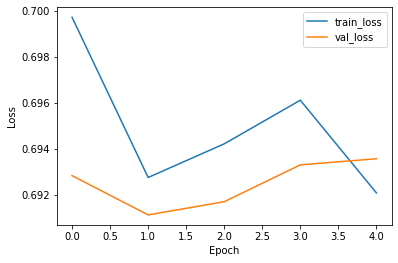

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5529 - auc_40: 0.6266 - auc_41: 0.5297 - false_negatives_10: 68.8889 - false_positives_10: 2.8889 - loss: 0.6822 - precision_20: 0.4167 - recall_20: 0.0295 - true_negatives_10: 79.5556 - true_positives_10: 1.5556
Fusion Net Test Accuracy: 50.00%
Fusion Net Precision: 0.33
Fusion Net Recall: 0.02
Fusion Net AUC-ROC: 0.62
Fusion Net AUC-PR: 0.55
Fusion Net TP: 2.0, FP: 4.0, TN: 118.0, FN: 116.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
Confusion Matrix:
[[118   4]
 [116   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.97      0.66       122
           1       0.33      0.02      0.03       118

    accuracy                           0.50       240
   macro avg       0.42      0.49      0.35       240
weighted avg       0.42      0.50      0.35       240

Fusion Net AUC Score: 0.49

Fusion Net Precision: 0.3333333333333333
Fusion Net Recall: 0.01694915254237288
Fusion Net F1 S

In [ ]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score,
    recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
)
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Flatten(),  # Flatten layer
    Reshape((1, -1)),  # Reshape for GRU
    GRU(128, return_sequences=True),  # GRU layer
    GRU(64),  # GRU layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
    'accuracy',
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),
    tf.keras.metrics.AUC(curve='PR'),
    tf.keras.metrics.TruePositives(),
    tf.keras.metrics.FalsePositives(),
    tf.keras.metrics.TrueNegatives(),
    tf.keras.metrics.FalseNegatives()
])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Fusion Net Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Fusion Net Precision: {precision:.2f}')
print(f'Fusion Net Recall: {recall:.2f}')
print(f'Fusion Net AUC-ROC: {auc_roc:.2f}')
print(f'Fusion Net AUC-PR: {auc_pr:.2f}')
print(f'Fusion Net TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Predict classes
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Fusion Net AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nFusion Net Precision:", precision)
print("Fusion Net Recall:", recall)
print("Fusion Net F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Fusion Net Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Fusion Net Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Fusion Net Balanced Accuracy: {balanced_acc:.2f}")

# Count the number of Monkeypox and Non-Monkeypox predictions
total_samples = len(test_predictions)
monkeypox_predictions = np.sum(test_predictions == 1)
non_monkeypox_predictions = np.sum(test_predictions == 0)

# Calculate the percentage for Monkeypox and Non-Monkeypox
monkeypox_percentage = (monkeypox_predictions / total_samples) * 100
non_monkeypox_percentage = (non_monkeypox_predictions / total_samples) * 100

# Print the percentages
print(f"Monkeypox Predictions: {monkeypox_percentage:.2f}% ({monkeypox_predictions}/{total_samples})")
print(f"Non-Monkeypox Predictions: {non_monkeypox_percentage:.2f}% ({non_monkeypox_predictions}/{total_samples})")

# Custom statement for dataset summary
if monkeypox_percentage > non_monkeypox_percentage:
    print(f"The model predicted more Monkeypox cases than non-Monkeypox cases.")
else:
    print(f"The model predicted more non-Monkeypox cases than Monkeypox cases.")

# End time
end_time = time.time()

# Print the total time taken
print(f"Total Time taken: {end_time - start_time:.2f} seconds")
